In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/2024-04-05_step7_lamb1987_azimuths.csv')
dataset

,Euler1,Euler2,Euler3,azimuth360,azimuth270,azimuth180,azimuth90
0,0,0,0,0.000,0.000,0.000,0.215
1,0,0,7,0.000,0.000,0.000,0.000
2,0,0,14,0.000,0.000,0.000,0.272
3,0,0,21,0.000,0.000,0.000,0.000
4,0,0,28,0.000,0.272,0.000,0.000
...,...,...,...,...,...,...,...
4389,84,84,147,0.010,0.010,0.007,0.010
4390,84,84,154,0.010,0.013,0.013,0.007
4391,84,84,161,0.006,0.011,0.009,0.008
4392,84,84,168,0.009,6.228,0.010,0.030


In [4]:
dataset[['azimuth360', 'azimuth270', 'azimuth180', 'azimuth90']].describe()

,azimuth360,azimuth270,azimuth180,azimuth90
count,4394.000000,4394.000000,4394.000000,4394.000000
mean,0.032053,0.037329,0.028223,0.066976
std,0.173836,0.323460,0.114000,0.349748
min,0.000000,0.000000,0.000000,0.000000
25%,0.003000,0.003000,0.002000,0.003000
50%,0.004000,0.005000,0.004000,0.008000
75%,0.010000,0.010000,0.010000,0.018000
max,6.138000,18.874000,2.566000,7.623000


## Visualize distributions

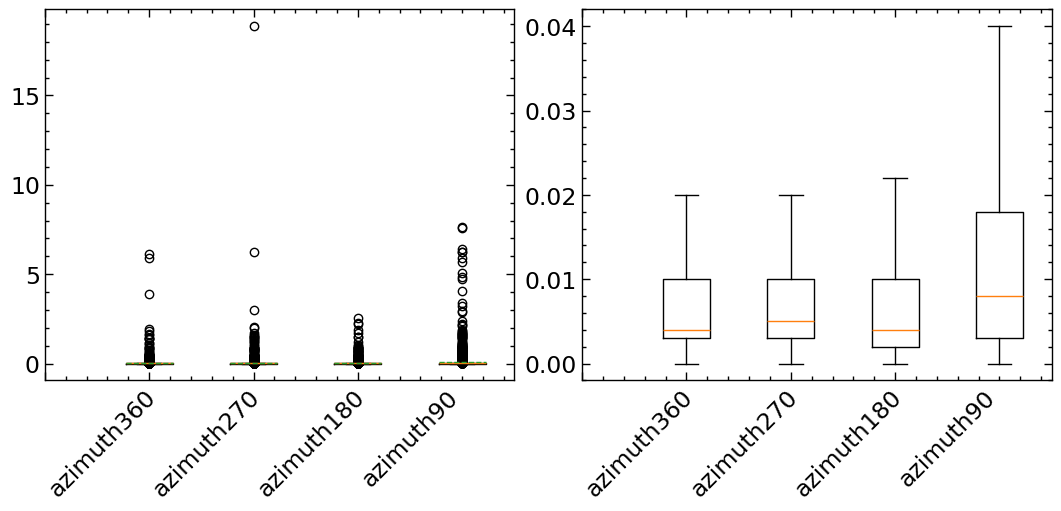

In [5]:
labels = ['azimuth360', 'azimuth270', 'azimuth180', 'azimuth90']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*2.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(4), labels, rotation=45, ha='left') 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(4), labels, rotation=45, ha='left') 



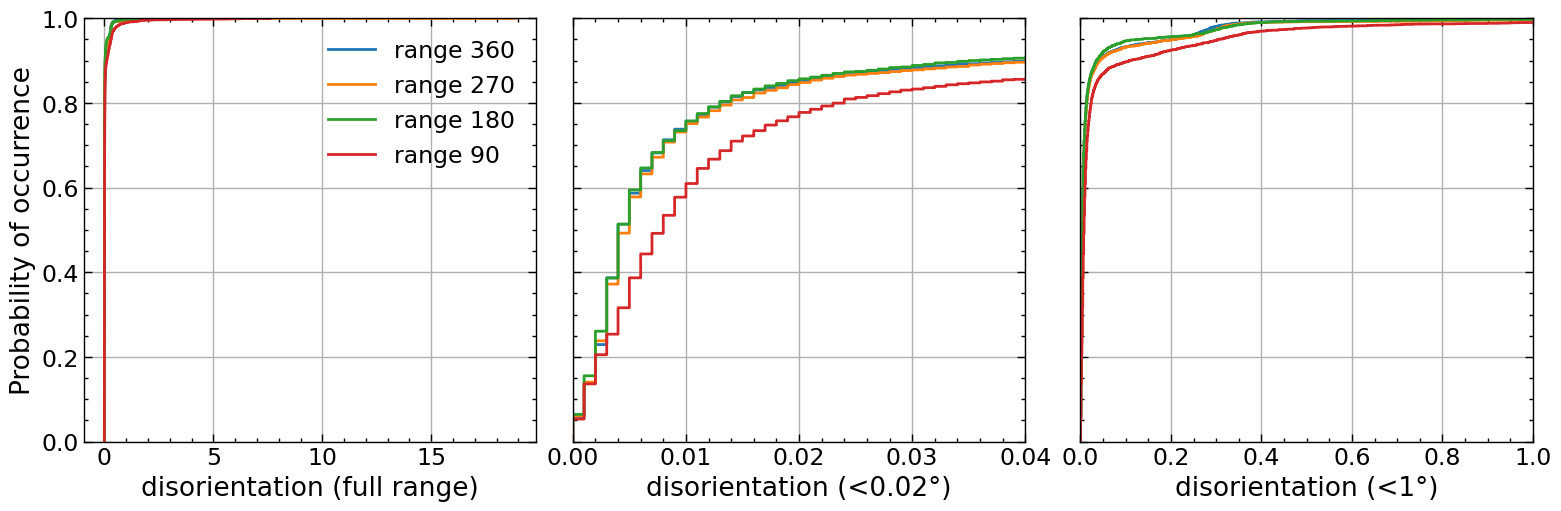

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['azimuth360'], label='range 360')
ax1.ecdf(dataset['azimuth270'], label='range 270')
ax1.ecdf(dataset['azimuth180'], label='range 180')
ax1.ecdf(dataset['azimuth90'], label='range 90')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['azimuth360'], label='range 360')
ax2.ecdf(dataset['azimuth270'], label='range 270')
ax2.ecdf(dataset['azimuth180'], label='range 180')
ax2.ecdf(dataset['azimuth90'], label='range 90')
ax2.set_xlim(left=0, right=0.04)
ax2.grid(True)
ax2.set_xlabel('disorientation (<0.02°)')

ax3.ecdf(dataset['azimuth360'], label='range 360')
ax3.ecdf(dataset['azimuth270'], label='range 270')
ax3.ecdf(dataset['azimuth180'], label='range 180')
ax3.ecdf(dataset['azimuth90'], label='range 90')
ax3.set_xlim(left=0, right=1)
ax3.set_xlabel('disorientation (<1°)')
_ = ax3.grid(True)

In [7]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [8]:
mid_360samples, iqr_360samples, ci_360samples, length_360samples = median(dataset['azimuth360'])
mid_270samples, iqr_270samples, ci_270samples, length_270samples = median(dataset['azimuth270'])
mid_180samples, iqr_180samples, ci_180samples, length_180samples = median(dataset['azimuth180'])
mid_90samples, iqr_90samples, ci_90samples, length_90samples = median(dataset['azimuth90'])

print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print('')
print('using a range of 360 degrees')
print(f'Median: {mid_360samples:.3f}; min,max: {ci_360samples}')
print(f'   IQR: {iqr_360samples:.3f}; length: {length_360samples:.3f}')
print('')
print('using a range of 270 degrees')
print(f'Median: {mid_270samples:.3f}; min,max: {ci_270samples}')
print(f'   IQR: {iqr_270samples:.3f}; length: {length_270samples:.3f}')
print('')
print('using a range of 180 degrees')
print(f'Median: {mid_180samples:.3f}; min,max: {ci_180samples}')
print(f'   IQR: {iqr_180samples:.3f}; length: {length_180samples:.3f}')
print('')
print('using a range of 90 degrees')
print(f'Median: {mid_90samples:.3f}; min,max: {ci_90samples}')
print(f'   IQR: {iqr_90samples:.3f}; length: {length_90samples:.3f}')
print('')



EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

using a range of 360 degrees
Median: 0.004; min,max: (0.004, 0.005)
   IQR: 0.007; length: 0.001

using a range of 270 degrees
Median: 0.005; min,max: (0.004, 0.005)
   IQR: 0.007; length: 0.001

using a range of 180 degrees
Median: 0.004; min,max: (0.004, 0.005)
   IQR: 0.008; length: 0.001

using a range of 90 degrees
Median: 0.008; min,max: (0.007, 0.008)
   IQR: 0.015; length: 0.001



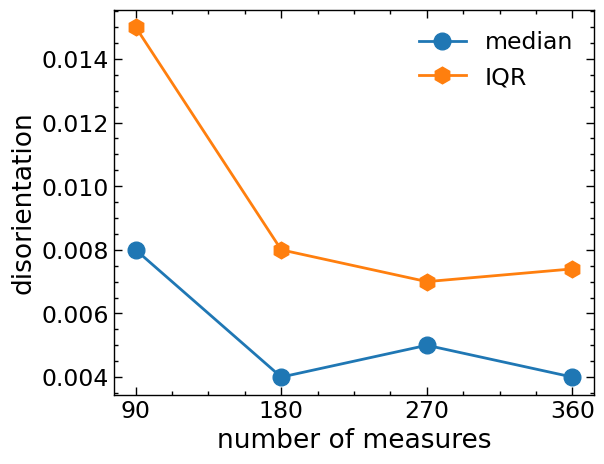

In [9]:
fig, ax = plt.subplots()

ax.plot([360, 270, 180, 90], [0.004, 0.005, 0.004, 0.008], 'o-', label='median')
ax.plot([360, 270, 180, 90], [0.0074, 0.007, 0.008, 0.015], 'h-', label='IQR')
ax.set_xticks([90, 180, 270, 360])  
ax.set_ylabel('disorientation')
ax.set_xlabel('number of measures')
ax.legend(loc='best')

## Percent of wrong estimates

In [10]:
print('% of wrong estimates:')
print(f"Percent above 1 degree (range 360): {100 * (dataset['azimuth360'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (range 270): {100 * (dataset['azimuth270'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (range 180): {100 * (dataset['azimuth180'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (range 90): {100 * (dataset['azimuth90'] > 1).mean():.2f} %")


% of wrong estimates:
Percent above 1 degree (range 360): 0.32 %
Percent above 1 degree (range 270): 0.39 %
Percent above 1 degree (range 180): 0.20 %
Percent above 1 degree (range 90): 0.98 %


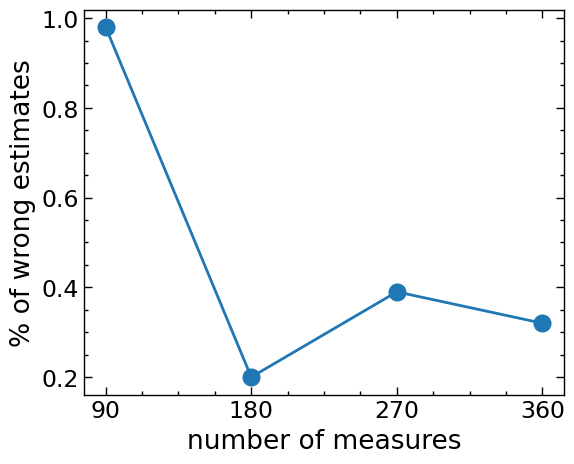

In [11]:
fig, ax = plt.subplots()

ax.plot([360, 270, 180, 90], [0.32, 0.39, 0.20, 0.98], 'o-')
ax.set_ylabel('% of wrong estimates')
ax.set_xlabel('number of measures')
_ = ax.set_xticks([90, 180, 270, 360]) 

## Others

In [12]:
dataset[dataset['azimuth360'] > 1]

,Euler1,Euler2,Euler3,azimuth360,azimuth270,azimuth180,azimuth90
48,0,7,154,1.422,0.002,0.305,0.025
51,0,7,175,1.960,0.167,0.117,0.394
105,0,28,7,1.808,0.000,0.002,0.006
385,7,7,147,1.680,0.820,0.048,0.017
657,7,84,49,6.138,0.001,0.001,0.028
1057,21,7,119,1.178,0.006,0.003,0.031
1724,35,7,56,1.411,0.133,0.003,0.007
3418,70,7,84,1.019,0.040,0.006,0.103
3454,70,14,154,3.868,0.037,0.015,0.040
3457,70,14,175,1.372,0.228,0.001,0.068


In [13]:
dataset[dataset['azimuth180'] > 1]

,Euler1,Euler2,Euler3,azimuth360,azimuth270,azimuth180,azimuth90
28,0,7,14,0.007,0.657,1.735,0.001
31,0,7,35,0.381,1.364,2.287,0.001
47,0,7,147,0.018,0.001,1.044,0.148
2078,42,7,168,0.484,0.014,2.227,0.006
2400,49,7,56,0.010,0.196,2.566,0.305
3429,70,7,161,0.010,0.050,1.866,0.984
4083,84,7,7,0.014,0.732,1.221,0.176
4133,84,14,175,0.618,0.252,1.464,0.320
4156,84,21,154,0.040,0.100,1.473,0.081
